# AIFFEL LMS Exploration 5 Project 1 - diabete

In [1]:
# 쓸만한 패키지 호출
from bs4 import BeautifulSoup     # 이거 해야 seaborn 호출 가능, 몇 가지 데이터 셋도 있음
import seaborn as sns             # 그래프 그리는 용
import numpy as np                # np.array 쓸거임, 평균 값 산출 mean 함수 포함, corrcoef 함수도 있음
import pandas as pd               # DF 쓸거임
from sklearn import datasets      # diabete 데이터는 여깄음
from sklearn.model_selection import train_test_split # training, test 데이터 분리 함수
from sklearn.metrics import mean_squared_error  # MSE 구하는 함수
import matplotlib.pyplot as plt   # 그래프 그려야함
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

(1) 데이터 가져오기
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
# sklearn에 무슨 데이터 셋 있는지, 정확한 명칭이 뭔지 확인
# datasets??

In [8]:
# 데이터 가져오기
data = datasets.load_diabetes()

In [16]:
# # 데이터 확인
# print(type(data))

<class 'sklearn.utils.Bunch'>


In [17]:
# print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [18]:
# print(data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [19]:
# data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [98]:
# data.DESCR??

(2) 모델에 입력할 데이터 X 준비하기
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [23]:
# X 데이터 따로 저장
X_data = data.data

In [24]:
data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [26]:
# 타입 확인 = numpy array
type(X_data)

numpy.ndarray

(3) 모델에 예측할 데이터 y 준비하기
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [27]:
# Y 데이터 따로 저장
Y_data = data.target

# 타입 확인 = numpy array
type(Y_data)

numpy.ndarray

(4) train 데이터와 test 데이터로 분리하기
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [28]:
# train 데이터와 test 데이터로 분리
# Test size = 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
모델 함수를 구현해주세요.

In [30]:
# 데이터 확인
X_train

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736771, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027149,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703713, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090444, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845911, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514531, -0.0010777 ]])

In [29]:
# X 데이터 갯수 확인 => 10개
X_train.shape

(353, 10)

In [58]:
# 모델 함수 구현
def model(X, W, b):
    
    # 예측 결과값 변수 정의 및 초기화
    predictions = 0
    
    # 10개의 w*x 수행
    for i in range(10):
        
        # :은 앞에 행 전체(1행~353행)에 대한 연산을 의미
        # i는 0~9가지 변하며 각 feature('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
        # 에 대한 계산
        predictions += X[:, i] * W[i]
        
    # bias 추가
    predictions += b
    return predictions
        

(6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [59]:
# MSE 함수 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    # a, b가 np.array 같은 시퀀스 데이터로 입력되면, 그 전체 행에 대한 평균 값 하나가
    # float64 형으로 반환된다.
    return mse

# MSE를 이용한 손실함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient 함수를 구현해주세요.

In [60]:
# # .T 전치함수 확인
# X_train.T.shape

In [61]:
def gradient(X, W, b, y):
    # N은 가중치의 갯수
    N = len(W)
    
    # y_pred : 예측값
    y_pred = model(X, W, b)
    
    # 공식에 따른 gradient 계산
    # X.T = X 행렬의 전치 행렬 : (353, 10) => (10, 353)으로 변환
    # .dot : 행렬의 내적 연산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [62]:
# 학습률 설정
LEARNING_RATE = 0.01

(9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [63]:
# 임의의 W, b 설정 
W = np.random.rand(10)
b = np.random.rand()

In [64]:
# # 초기 파라미터 값 확인
# print(W.shape)
# print(W)
# type(b)

In [65]:
# 모델 학습
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, Y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, Y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2949.3071
Iteration 2000 : Loss 2901.9009
Iteration 3000 : Loss 2897.6742
Iteration 4000 : Loss 2896.4407
Iteration 5000 : Loss 2895.5689
Iteration 6000 : Loss 2894.7700
Iteration 7000 : Loss 2894.0025
Iteration 8000 : Loss 2893.2591
Iteration 9000 : Loss 2892.5381
Iteration 10000 : Loss 2891.8385


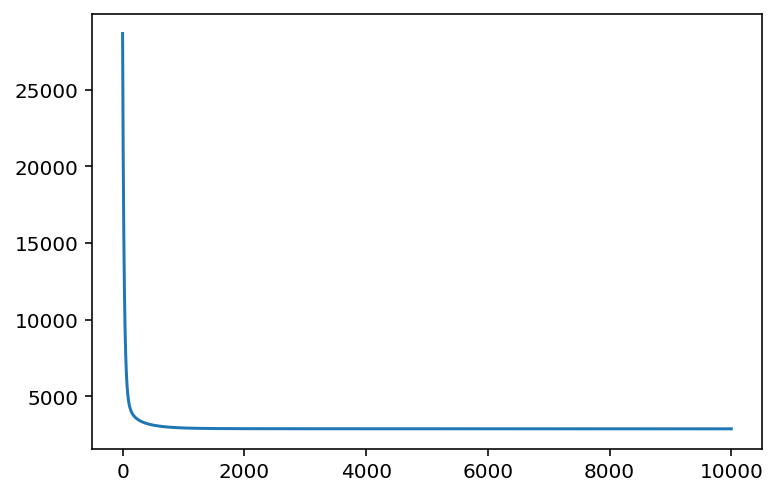

In [66]:
plt.plot(losses)
plt.show()

(10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [96]:
# test 데이터 확인

# 예측 값 산출
Y_prediction = model(X_test, W, b)

# X_test 데이터를 모델에 넣어 얻은 예측값과 Y_test 값 사이의 MSE값 산출
mse = mean_squared_error(Y_test, Y_prediction)
# mse = loss(X_test, W, b, Y_test)
mse

2885.5498349896734

(11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

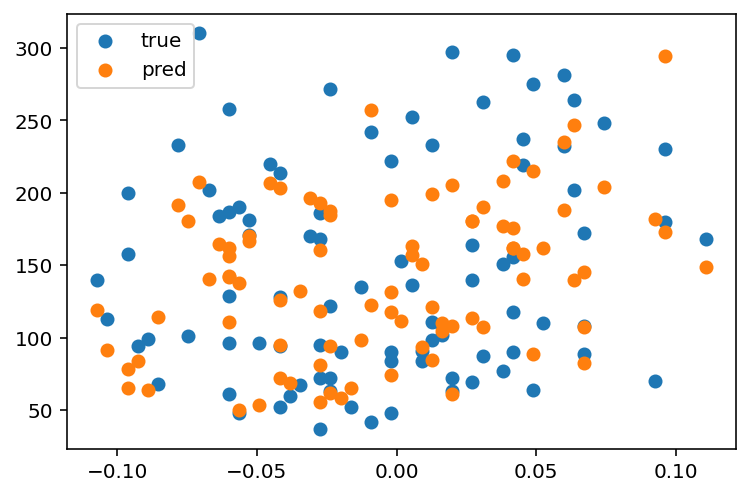

In [97]:
# 데이터 시각화 - 산포도 이용
plt.scatter(X_test[:, 0], Y_test, label="true")
plt.scatter(X_test[:, 0], Y_prediction, label="pred")
plt.legend()
plt.show()

* 진행 과정에 대한 로그

    - 모델 학습 진행률을 처음에 0.0001 로 설정하였으나, 모델 학습에 너무 많은 시간이 
      소요되어서 0.01로 변경하였습니다.
    - 모델 학습 과정에서 print 되는 내용이 너무 많지 않도록 step 1000개마다 1번씩 
      출력되도록 변경하였습니다.
      
* 느낀 점
    
    - 사실 당뇨병 자체에 대한 이해가 부족하고, 1년 후 질병 진행을 정량적으로 나타낸 것
      이라는 target data의 수치를 봤을 때, 이 수치의 의미가 직접적으로 와닿지 않은
      점이 아쉬었습니다.
    - 그러다보니 모델이 나타내는 loss의 수치만 보아서는 이 모델의 정확도가 어느 정도 
      되는지 체감하기 어려웠습니다.